# Import Modules

In [219]:
#Import all necessary modules
import pandas as pd  
import numpy as np
import os 
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [220]:
df = pd.read_csv("cubic_zirconia.csv")

# PROBLEM 1
## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [221]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289


### Dataframe Info

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Check for Duplicate Values

In [223]:
df.duplicated().sum()

0

### Drop unnecessary Fields 

In [224]:
df['Unnamed: 0'].value_counts()

2047     1
5480     1
1322     1
3371     1
13612    1
        ..
8881     1
15026    1
12979    1
2740     1
2049     1
Name: Unnamed: 0, Length: 26967, dtype: int64

In [225]:
df.drop('Unnamed: 0',axis = 1,inplace= True)

### Check for Outliers

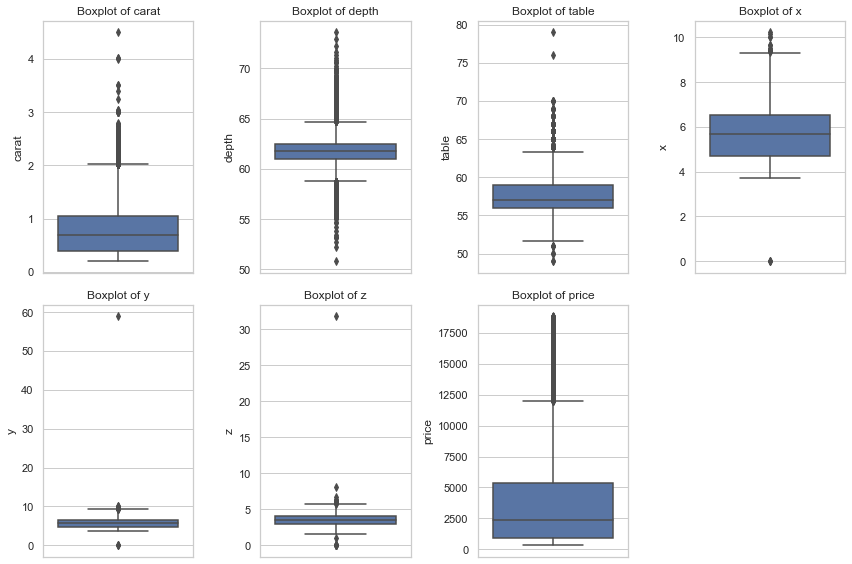

In [226]:
plt.figure(figsize = (12,8))
Features = df.select_dtypes(exclude='object').columns
for i in range(len(Features)):
    plt.subplot(2,4, i + 1)
    sns.boxplot(y = df[Features[i]], data = df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

We can observe, many outliers in the dataframe. In Order to check the effect of treating Outliers on the efficacy of model, I will create a copy of existing dataframe to treat outliers.

In [227]:
df_outlier = df.copy()

In [228]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [229]:
Feature_list = df.select_dtypes(exclude='object').columns
for i in Feature_list:
    lr, ur = detect_outliers(df[i])
    df[i] = np.where(df[i] > ur, ur,df[i])
    df[i] = np.where(df[i] < lr, lr,df[i])

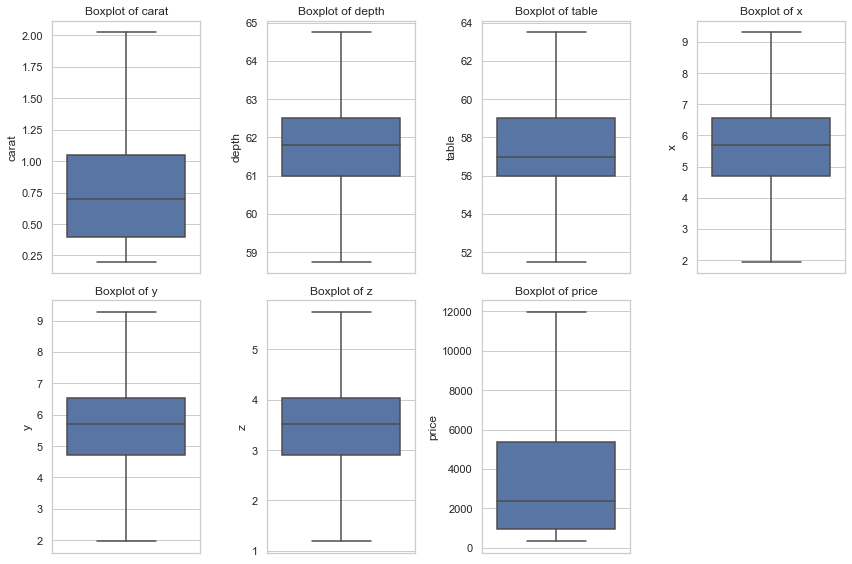

In [230]:
plt.figure(figsize = (12,8))
Features = df.select_dtypes(exclude='object').columns
for i in range(len(Features)):
    plt.subplot(2,4, i + 1)
    sns.boxplot(y = df[Features[i]], data = df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

### Check for Missing Values

In [231]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth       True
table      False
x          False
y          False
z          False
price      False
dtype: bool

### Univariant Analysis

In [232]:
Num_Features = df_outlier.select_dtypes(exclude='object').columns

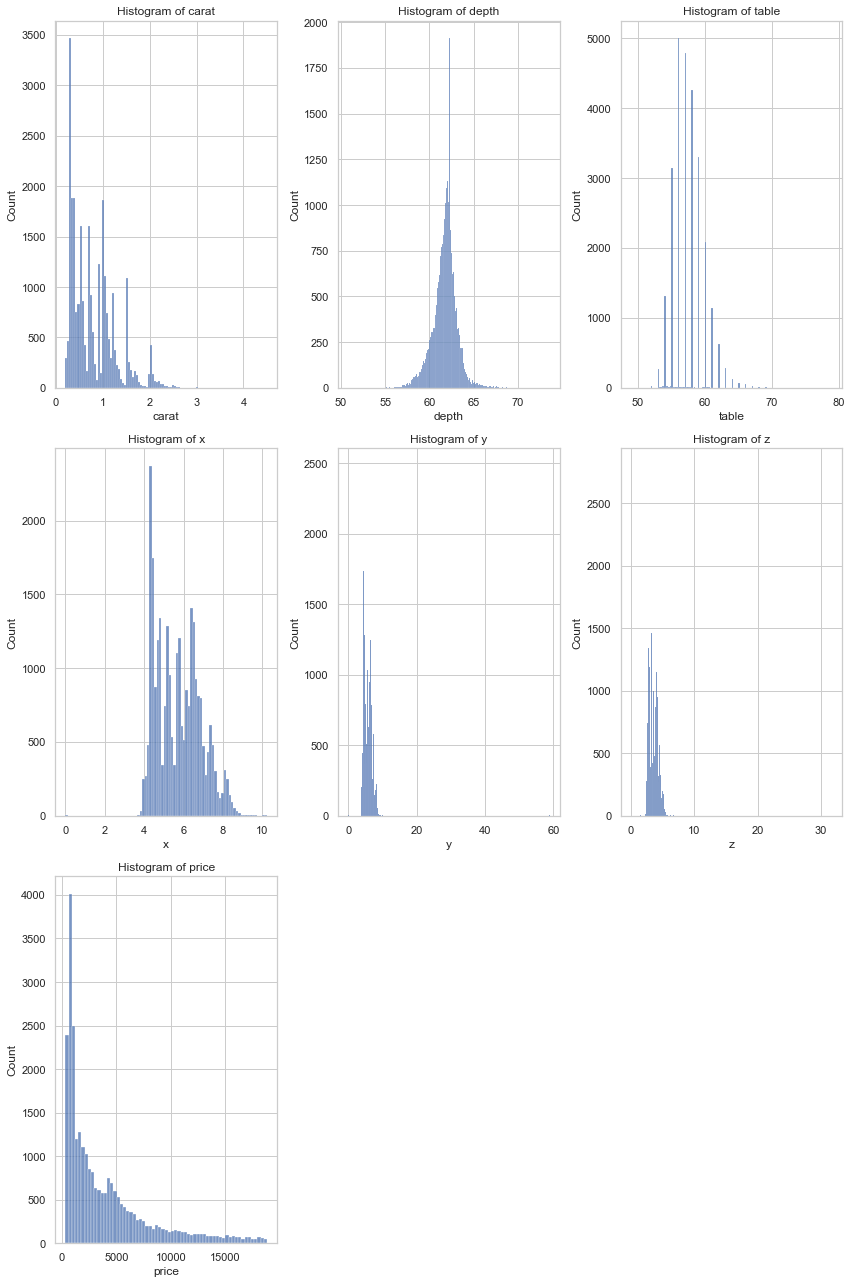

In [233]:
plt.figure(figsize = (12,18))
for i in range(len(Num_Features)):
    plt.subplot(3,3, i + 1)
    sns.histplot(x = df_outlier[Num_Features[i]], data = df_outlier)
    plt.title(f"Histogram of {Num_Features[i]}")
    plt.tight_layout()

In [234]:
df_outlier.skew(axis = 0, skipna = True)

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [235]:
Cat_Features = df_outlier.select_dtypes(include='object').columns

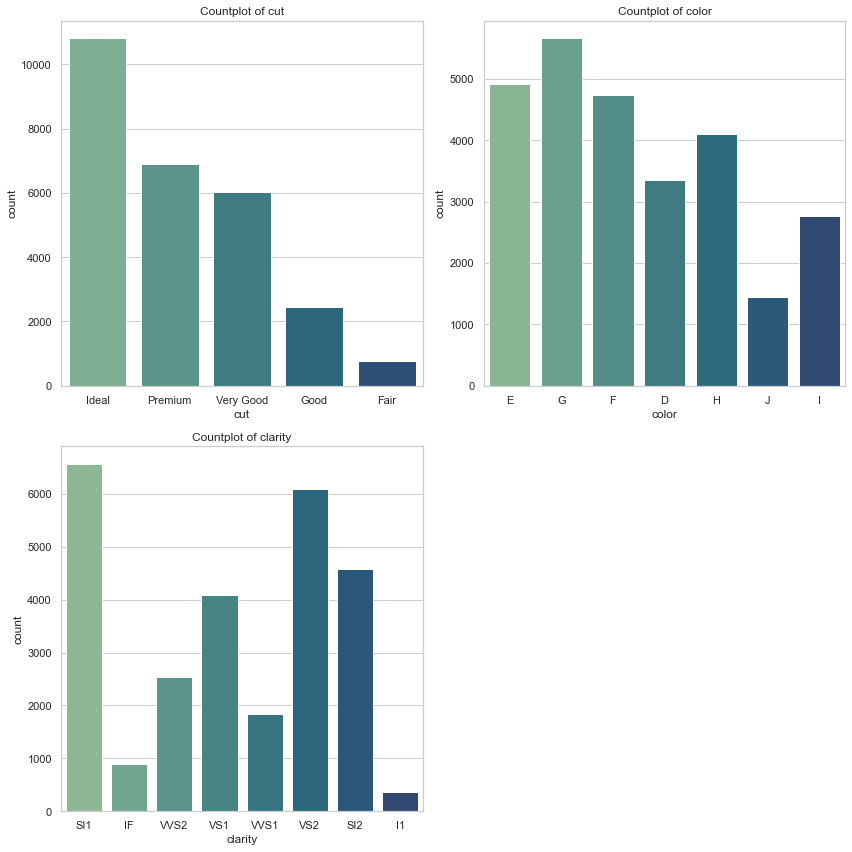

In [236]:
plt.figure(figsize = (12,12))
for i in range(len(Cat_Features)):
    plt.subplot(2,2, i + 1)
    sns.countplot(x = df_outlier[Cat_Features[i]], data = df_outlier, palette ='crest')
    plt.title(f"Countplot of {Cat_Features[i]}")
    plt.tight_layout()

In [237]:
df_outlier['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [238]:
df_outlier['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [239]:
df_outlier['clarity'].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

### Bivariant Analysis
#### HeatMap

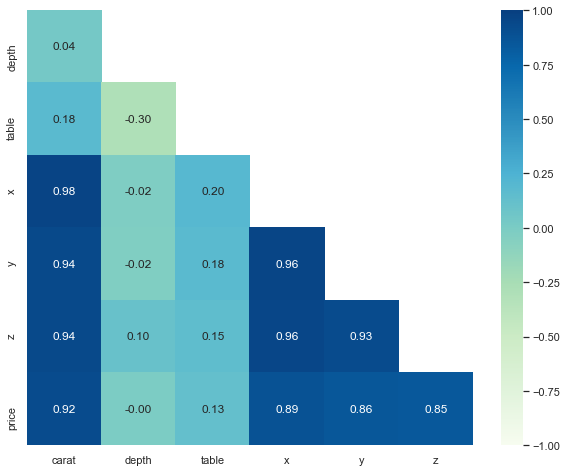

In [240]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_outlier.corr(), dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_outlier.corr().iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='GnBu',
           vmin=-1, vmax=1)
# yticks
#plt.yticks(rotation=0)
plt.show()

#### Pairplot

<Figure size 720x2160 with 0 Axes>

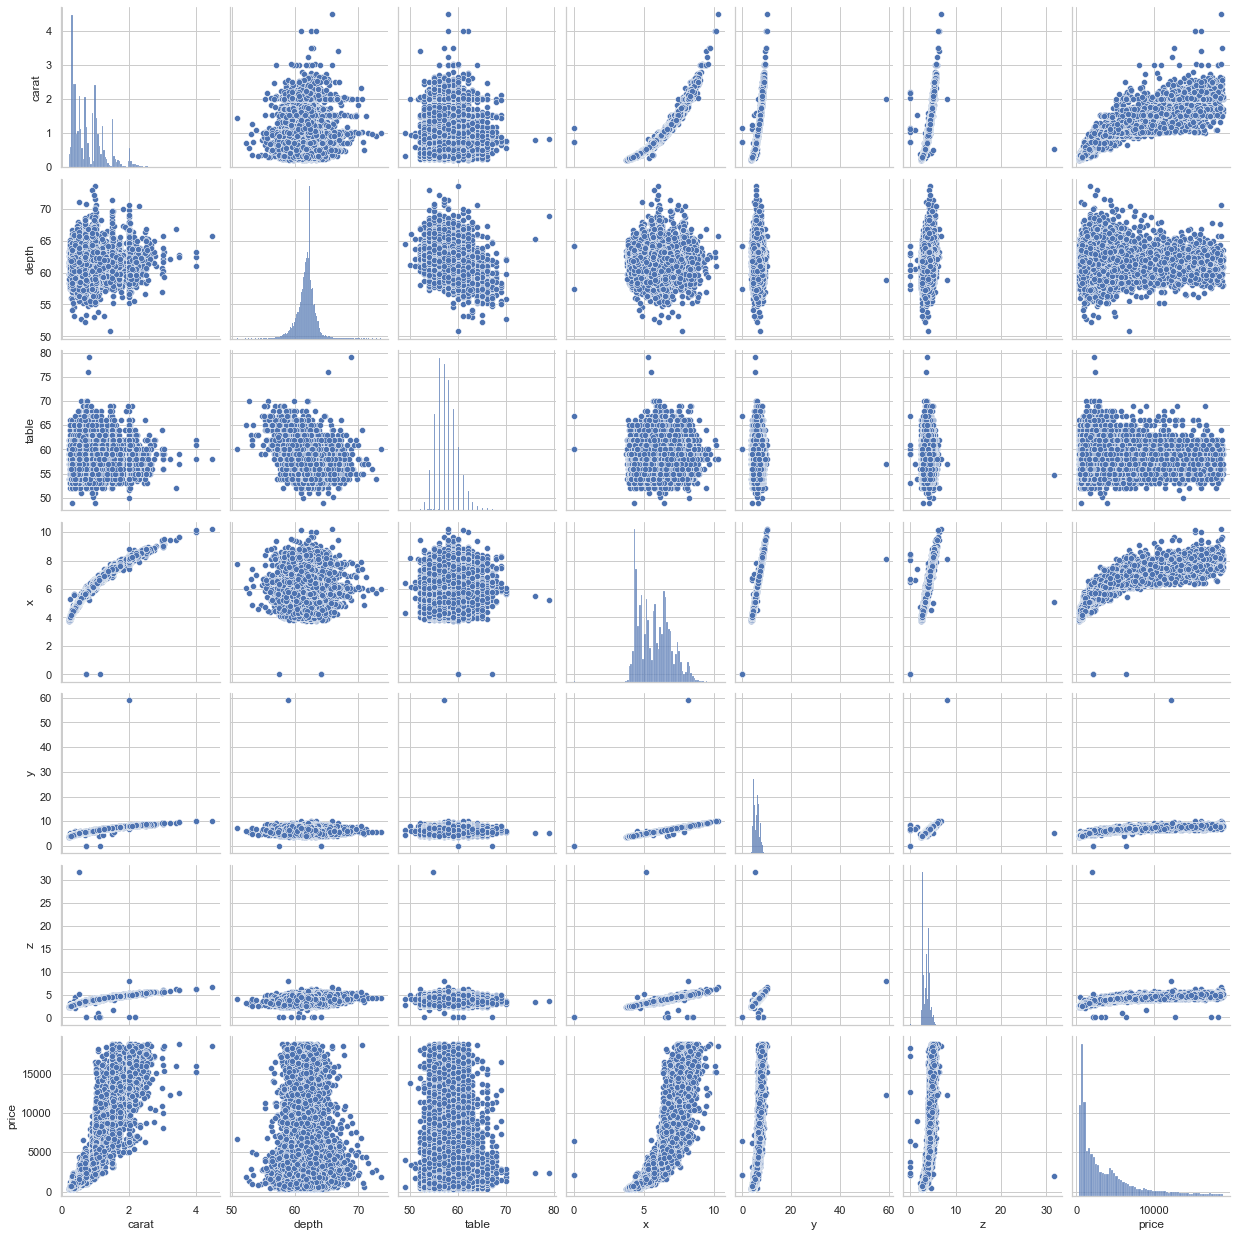

In [241]:
plt.figure(figsize = (10,30));
sns.pairplot(data = df_outlier);
plt.show();

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

### Checking for null values

In [242]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [243]:
df['depth'].isnull().sum() / df['depth'].count() * 100

2.653216596878569

### Imputing Dataframe With Outliers : df_outlier

In [244]:
df_outlier['depth'].fillna(df_outlier['depth'].median(), inplace = True)

In [245]:
df_outlier.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Imputing Dataframe Without Outliers : df

In [246]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [247]:
df['depth'].fillna(df['depth'].mean(), inplace = True)

In [248]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Checking for 0's present in dataframe

In [249]:
for column_name in df_outlier.columns:
    column = df_outlier[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  carat  is :  0
Count of zeros in column  cut  is :  0
Count of zeros in column  color  is :  0
Count of zeros in column  clarity  is :  0
Count of zeros in column  depth  is :  0
Count of zeros in column  table  is :  0
Count of zeros in column  x  is :  3
Count of zeros in column  y  is :  3
Count of zeros in column  z  is :  9
Count of zeros in column  price  is :  0


In [250]:
df_outlier = df_outlier[(df_outlier.x != 0) & (df_outlier.y != 0) & (df_outlier.z != 0)]

In [251]:
for column_name in df_outlier.columns:
    column = df_outlier[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  carat  is :  0
Count of zeros in column  cut  is :  0
Count of zeros in column  color  is :  0
Count of zeros in column  clarity  is :  0
Count of zeros in column  depth  is :  0
Count of zeros in column  table  is :  0
Count of zeros in column  x  is :  0
Count of zeros in column  y  is :  0
Count of zeros in column  z  is :  0
Count of zeros in column  price  is :  0


### Checking the Object type columns

In [252]:
Cat_Features

Index(['cut', 'color', 'clarity'], dtype='object')

In [253]:
df['cut'].value_counts(normalize = True) * 100

Ideal        40.108280
Premium      25.583120
Very Good    22.360663
Good          9.051804
Fair          2.896132
Name: cut, dtype: float64

In [254]:
df['color'].value_counts(normalize = True) * 100

G    20.992324
E    18.233396
F    17.536248
H    15.211184
D    12.400341
I    10.275522
J     5.350985
Name: color, dtype: float64

In [255]:
df['clarity'].value_counts(normalize = True) * 100

SI1     24.366819
VS2     22.616531
SI2     16.965180
VS1     15.177810
VVS2     9.385545
VVS1     6.819446
IF       3.315163
I1       1.353506
Name: clarity, dtype: float64

In [256]:
df.groupby(['cut'])['price'].sum().reset_index()

,cut,price
0,Fair,3419146.0
1,Good,9211850.0
2,Ideal,35506278.0
3,Premium,29555698.5
4,Very Good,23107358.0


#### Observations
1. Cut : From the above counts, we can combine Good (~ 9%) and Fair (~ 2%) because fair constitute of very less percent of data and Fair doesn't mean bad hence can be combined.

2. Color : From the above counts, we can combine I (~ 10%) and J (~ 5%)  as Others because J constitute of very less percent of data and hence can be combined.

3. Clarity : From the above counts, we can combine IF (~ 3%) and I1 (~ 1.3%)  as Others because IF and I1 constitute of very less percent of data and hence can be combined as Others.

#### Combining different sublabels in different categories


In [257]:
df['cut'] = df['cut'].str.replace('Fair', 'Good')
df['clarity'] = df['clarity'].str.replace('IF', 'Others')
df['clarity'] = df['clarity'].str.replace('I1', 'Others')
df['color'] = df['color'].str.replace('I', 'Others')
df['color'] = df['color'].str.replace('J', 'Others')

In [258]:
df['cut'].value_counts(normalize = True) * 100

Ideal        40.108280
Premium      25.583120
Very Good    22.360663
Good         11.947936
Name: cut, dtype: float64

In [259]:
df['color'].value_counts(normalize = True) * 100

G         20.992324
E         18.233396
F         17.536248
Others    15.626506
H         15.211184
D         12.400341
Name: color, dtype: float64

In [260]:
df['clarity'].value_counts(normalize = True) * 100

SOthers    24.366819
VS2        22.616531
SI2        16.965180
VS1        15.177810
VVS2        9.385545
VVS1        6.819446
Others      4.668669
Name: clarity, dtype: float64

In [261]:
df['clarity'] = df['clarity'].str.replace('SOthers', 'SI1')
df['clarity'].value_counts(normalize = True) * 100 

SI1       24.366819
VS2       22.616531
SI2       16.965180
VS1       15.177810
VVS2       9.385545
VVS1       6.819446
Others     4.668669
Name: clarity, dtype: float64

**Similar treatment has to be done on the dataframe with Outliers**

In [262]:
df_outlier['cut'] = df_outlier['cut'].str.replace('Fair', 'Good')
df_outlier['clarity'] = df_outlier['clarity'].str.replace('IF', 'Others')
df_outlier['clarity'] = df_outlier['clarity'].str.replace('I1', 'Others')
df_outlier['color'] = df_outlier['color'].str.replace('I', 'Others')
df_outlier['color'] = df_outlier['color'].str.replace('J', 'Others')

In [263]:
df_outlier['clarity'] = df_outlier['clarity'].str.replace('SOthers', 'SI1')
df_outlier['clarity'].value_counts(normalize = True) * 100 

SI1       24.371244
VS2       22.620372
SI2       16.956006
VS1       15.179168
VVS2       9.388679
VVS1       6.821723
Others     4.662809
Name: clarity, dtype: float64

In [264]:
df_outlier['color'].value_counts(normalize = True) * 100

G         20.988204
E         18.239484
F         17.534684
Others    15.631723
H         15.201424
D         12.404481
Name: color, dtype: float64

In [265]:
df_outlier['cut'].value_counts(normalize = True) * 100

Ideal        40.121671
Premium      25.569404
Very Good    22.368128
Good         11.940797
Name: cut, dtype: float64

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Splitting the Data into train and test datasets for Dataframe without Outliers


In [411]:
X = df.drop('price', axis =1)
y = df['price']

In [412]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# Seperating the Continuous and Categorical variables 
 
X_train_cont = X_train.select_dtypes(include= 'number',exclude='object')
X_train_cat = X_train.select_dtypes(include='object',exclude='number')

X_test_cont = X_test.select_dtypes(include= 'number',exclude='object')
X_test_cat = X_test.select_dtypes(include='object',exclude='number')

### Scalling Dataframe without Outliers

In [413]:
from sklearn.preprocessing import StandardScaler

#Intilizing object of StandardScaler
zscore = StandardScaler() 

In [414]:
X_train_cont_scaled= pd.DataFrame(zscore.fit_transform(X_train_cont),columns = X_train_cont.columns)
X_test_cont_scaled= pd.DataFrame(zscore.transform(X_test_cont),columns = X_test_cont.columns)

In [415]:
# Merging the Categorical and Continuous datasets
 
X_train_scaled = X_train_cont_scaled.reset_index(drop=True).merge(right= X_train_cat.reset_index(drop=True),left_index =True,right_index =True)
 
X_test_scaled = X_test_cont_scaled.reset_index(drop=True).merge(right= X_test_cat.reset_index(drop=True),left_index =True,right_index =True)

In [416]:
X_train_scaled.shape , X_test_scaled.shape , y_train.shape , y_test.shape

((18876, 9), (8091, 9), (18876,), (8091,))

In [420]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,18876.00,-0.00,1.00,-1.29,-0.86,-0.20,0.56,2.68
depth,18876.00,-0.00,1.00,-2.41,-0.52,0.05,0.61,2.42
table,18876.00,0.00,1.00,-2.75,-0.66,-0.20,0.73,2.81
x,18876.00,0.00,1.00,-3.37,-0.90,-0.03,0.73,3.19
y,18876.00,0.00,1.00,-3.39,-0.91,-0.02,0.72,3.19
z,18876.00,0.00,1.00,-3.39,-0.91,-0.03,0.72,3.19


### Encoding Dataframes
1. X_train, X_test
2. X_train_scaled, X_test_scaled

In [343]:
import category_encoders as ce

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=[['cut','color','clarity']],return_df=True,
                           mapping=[
{'col':'cut', 'mapping':{'Ideal':0,'Premium':1,'Very Good':2,'Good':3}},
{'col':'color', 'mapping':{'G':0,'E':1,'F':2,'H':3, 'D':4,'Others':5}},
{'col':'clarity', 'mapping':{'SI1':0,'VS2':1,'SI2':2,'VS1':3, 'VVS2':4, 'VVS1': 5, 'Others':6}}])


In [344]:
# Fit and transform train data for X_train, X_test

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [345]:
# Fit and transform train data for X_train_scaled, X_test_scaled

X_train_scaled_encoded = encoder.fit_transform(X_train_scaled)
X_test_scaled_encoded = encoder.transform(X_test_scaled)

### Splitting the Data into train and test datasets for Dataframe With Outliers

In [346]:
X_Out = df_outlier.drop('price', axis =1)
y_out = df_outlier['price']

In [347]:
X_train_O,X_test_O,y_train_O,y_test_O=train_test_split(X_Out,y_out,test_size=0.3,random_state=100)
# Seperating the Continuous and Categorical variables 
 
X_train_cont_O = X_train_O.select_dtypes(include= 'number',exclude='object')
X_train_cat_O = X_train_O.select_dtypes(include='object',exclude='number')

X_test_cont_O = X_test_O.select_dtypes(include= 'number',exclude='object')
X_test_cat_O = X_test_O.select_dtypes(include='object',exclude='number')

### Scalling dataframes

In [348]:
X_train_cont_O_scaled= pd.DataFrame(zscore.fit_transform(X_train_cont_O),columns = X_train_cont_O.columns)
X_test_cont_O_scaled= pd.DataFrame(zscore.transform(X_test_cont_O),columns = X_test_cont_O.columns)

In [349]:
# Merging the Categorical and Continuous datasets
 
X_train_O_scaled = X_train_cont_O_scaled.reset_index(drop=True).merge(right= X_train_cat_O.reset_index(drop=True),left_index =True,right_index =True)
X_test_O_scaled = X_test_cont_O_scaled.reset_index(drop=True).merge(right= X_test_cat_O.reset_index(drop=True),left_index =True,right_index =True)

In [350]:
X_train_O_scaled.shape , y_train_O.shape, X_test_O_scaled.shape, y_test_O.shape

((18870, 9), (18870,), (8088, 9), (8088,))

### Encoding Dataframes
1. X_train_O, X_test_O
2. X_train_O_scaled, X_test_O_scaled

In [351]:
# Fit and transform train data for X_train_O, X_test_O

X_train_O_encoded = encoder.fit_transform(X_train_O)
X_test_O_encoded = encoder.transform(X_test_O)

In [352]:
# Fit and transform train data for X_train_O_scaled, X_test_O_scaled

X_train_O_scaled_encoded = encoder.fit_transform(X_train_O_scaled)
X_test_O_scaled_encoded = encoder.transform(X_test_O_scaled)

### So, now we have 4 different dataframes :
1. Normal dataframe with Outliers and Not Scaled : X_train_O_encoded, X_test_O_encoded,y_train_O, y_test_O
2. Scaled dataframe with Outliers : X_train_O_scaled_encoded, X_test_O_scaled_encoded, y_train_O, y_test_O
3. Normal dataframe without Outliers : X_train_encoded, X_test_encoded, y_train, y_test
4. Scaled dataframe without Outliers : X_train_scaled_encoded, X_test_scaled_encoded, y_train, y_test

### ------------------------------------------------------- ITERATION 1  -------------------------------------------------------

## Building Linear regression Model for Normal dataframe with Outliers and Not Scaled

In [353]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

In [354]:
regression_model = LinearRegression()
regression_model.fit(X_train_O_encoded, y_train_O)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [355]:
# Model Score for Training Dataset
regression_model.score(X_train_O_encoded, y_train_O)

0.8702313993889694

In [356]:
# Model Score for testing Dataset
regression_model.score(X_test_O_encoded, y_test_O)

0.8740568823620255

#### Using Statsmodel library to get R type outputs

In [357]:
data_train_O = pd.concat([X_train_O_encoded, y_train_O], axis=1)
data_train_O.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
5216,1.55,1,0,1,60.5,60.0,7.49,7.46,4.52,10499
23107,1.03,1,1,3,62.8,58.0,6.46,6.41,4.04,8629
26898,1.50,3,0,1,61.4,58.8,7.32,7.37,4.50,13307


In [358]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_O).fit()
lm1.params

Intercept    16042.813929
carat        11039.487643
cut           -150.458972
color         -195.020305
clarity         96.681385
depth         -158.215882
table          -57.721248
x            -1302.636765
y               22.172814
z              -25.730802
dtype: float64

In [359]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:52:56   Log-Likelihood:            -1.6403e+05
No. Observations:               18870   AIC:                         3.281e+05
Df Residuals:                   18860   BIC:                         3.282e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.604e+04    810.818     19.786      0.000    1.45e+04    1.76e+04
carat       1.104e+04    110.904     99.541      0.000    1.08e+04    1.13e+04
cut         -150.4590     12.100    -12.435      0.000    -174.176    -126.742
color       -195.0203      6.199    -31.462      0.000    -207.170    -182.871
clarity       96.6814      6.223     15.535      0.000      84.483     108.880
depth       -158.2159      9.194    -17.209      0.000    -176.237    -140.195
table        -57.7212      5.914     -9.760      0.000     -69.314     -46.129
x          -1302.6368     60.278    -21.611      0.000   -1420.787   -1184.487
y             22.1728     28.304      0.783      0.433     -33.306      77.651
z            -25.7308     49.601     -0.519      0.604    -122.953      71.491
==============================================================================
Omnibus:                     4129.539   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168949.089
Skew:                           0.201   Prob(JB):                         0.00
Kurtosis:                      17.653   Cond. No.                     6.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [360]:
import math
mse_O = np.mean((regression_model.predict(X_test_O_encoded)-y_test_O)**2)
math.sqrt(mse_O)

1444.034196429008

### So there is avg of 1444.03 (roundoff) price difference from real price on an avg

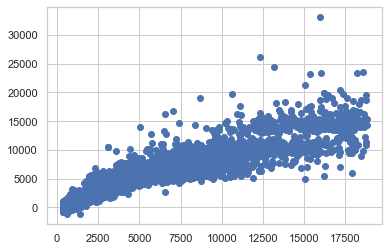

In [361]:
y_pred_O = regression_model.predict(X_test_O_encoded)
plt.scatter(y_test_O, y_pred_O);

### ------------------------------------------------------- ITERATION 2  -------------------------------------------------------
## Building Linear regression Model for Scaled dataframe with Outliers

In [369]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train_O_scaled_encoded, y_train_O)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [370]:
# Model Score for Training Dataset
regression_model2.score(X_train_O_scaled_encoded, y_train_O)

0.8702313993889694

In [372]:
# Model Score for testing Dataset
regression_model2.score(X_test_O_scaled_encoded, y_test_O)

0.8740568823620255

#### Using Statsmodel library to get R type outputs

In [382]:
data_train_O_scaled = X_train_O_scaled_encoded.reset_index(drop=True).merge(right= y_train_O.reset_index(drop=True),left_index =True,right_index =True)
data_train_O_scaled.head(3)

,carat,depth,table,x,y,z,cut,color,clarity,price
0,1.577885,-0.897823,1.146351,1.564488,1.459524,1.349266,1,0,1,10499
1,0.485413,0.754872,0.246845,0.646987,0.569360,0.686859,1,1,3,8629
2,1.472839,-0.251116,0.606647,1.413056,1.383225,1.321666,3,0,1,13307


In [380]:
lm2 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_O_scaled).fit()
lm2.params

Intercept    4344.107136
carat        5254.629028
cut          -150.458972
color        -195.020305
clarity        96.681385
depth        -220.183828
table        -128.339845
x           -1462.360182
y              26.154094
z             -18.645321
dtype: float64

In [381]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:01:48   Log-Likelihood:            -1.6403e+05
No. Observations:               18870   AIC:                         3.281e+05
Df Residuals:                   18860   BIC:                         3.282e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4344.1071     25.994    167.116      0.000    4293.156    4395.059
carat       5254.6290     52.789     99.541      0.000    5151.159    5358.099
cut         -150.4590     12.100    -12.435      0.000    -174.176    -126.742
color       -195.0203      6.199    -31.462      0.000    -207.170    -182.871
clarity       96.6814      6.223     15.535      0.000      84.483     108.880
depth       -220.1838     12.795    -17.209      0.000    -245.263    -195.105
table       -128.3398     13.150     -9.760      0.000    -154.115    -102.564
x          -1462.3602     67.669    -21.611      0.000   -1594.997   -1329.723
y             26.1541     33.386      0.783      0.433     -39.286      91.594
z            -18.6453     35.942     -0.519      0.604     -89.095      51.805
==============================================================================
Omnibus:                     4129.539   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168949.089
Skew:                           0.201   Prob(JB):                         0.00
Kurtosis:                      17.653   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [383]:
mse_1 = np.mean((regression_model.predict(X_test_O_scaled_encoded)-y_test_O)**2)
math.sqrt(mse_1)

1444.034196429008

### So there is avg of 1444.03 (roundoff) price difference from real price on an avg

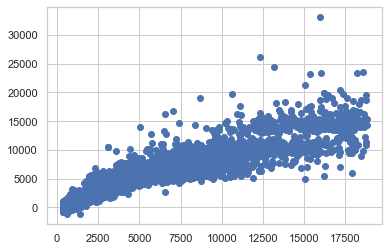

In [384]:
y_pred_1 = regression_model.predict(X_test_O_scaled_encoded)
plt.scatter(y_test_O, y_pred_1);

### ------------------------------------------------------- ITERATION 3  -------------------------------------------------------
## Building Linear regression Model for Normal dataframe without Outliers


In [385]:
# : X_train_encoded, X_test_encoded, y_train, y_test

In [386]:
regression_model3 = LinearRegression()
regression_model3.fit(X_train_encoded, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [387]:
# Model Score for Training Dataset
regression_model3.score(X_train_encoded, y_train)

0.8934511207325752

In [388]:
# Model Score for testing Dataset
regression_model3.score(X_test_encoded, y_test)

0.8984796777059929

#### Using Statsmodel library to get R type outputs

In [389]:
data_train_encoded = X_train_encoded.reset_index(drop=True).merge(right= y_train.reset_index(drop=True),left_index =True,right_index =True)
data_train_encoded.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.55,1,0,1,60.5,60.0,7.49,7.46,4.52,10499.0
1,1.05,0,0,2,62.3,56.0,6.52,6.58,4.08,4561.0
2,1.50,3,0,1,61.4,58.8,7.32,7.37,4.50,11982.5


In [390]:
lm3 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_encoded).fit()
lm3.params

Intercept    6178.909338
carat        8987.684474
cut          -136.198108
color        -154.014598
clarity       109.933457
depth         -57.188802
table         -30.900193
x           -2489.608603
y            2074.919429
z            -461.148029
dtype: float64

In [391]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 1.758e+04
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:10:19   Log-Likelihood:            -1.5943e+05
No. Observations:               18876   AIC:                         3.189e+05
Df Residuals:                   18866   BIC:                         3.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6178.9093    871.764      7.088      0.000    4470.174    7887.645
carat       8987.6845     99.603     90.235      0.000    8792.453    9182.916
cut         -136.1981      9.531    -14.290      0.000    -154.880    -117.517
color       -154.0146      4.822    -31.939      0.000    -163.467    -144.563
clarity      109.9335      4.844     22.695      0.000     100.439     119.428
depth        -57.1888     11.586     -4.936      0.000     -79.899     -34.478
table        -30.9002      4.848     -6.374      0.000     -40.402     -21.398
x          -2489.6086    137.820    -18.064      0.000   -2759.748   -2219.469
y           2074.9194    137.391     15.102      0.000    1805.621    2344.217
z           -461.1480    131.132     -3.517      0.000    -718.178    -204.118
==============================================================================
Omnibus:                     4199.645   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32497.389
Skew:                           0.860   Prob(JB):                         0.00
Kurtosis:                       9.194   Cond. No.                     9.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [393]:
mse_2 = np.mean((regression_model.predict(X_test_encoded)-y_test)**2)
math.sqrt(mse_2)

3077.23689018252

### So there is avg of 3077.23 (roundoff) price difference from real price on an avg

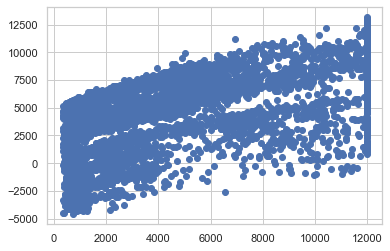

In [395]:
y_pred_2 = regression_model.predict(X_test_encoded)
plt.scatter(y_test, y_pred_2);

### ------------------------------------------------------- ITERATION 4  -------------------------------------------------------
## Building Linear regression Model for Scaled dataframe without Outliers


In [422]:
X_train_scaled_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,18876.00,-0.00,1.00,-1.29,-0.86,-0.20,0.56,2.68
depth,18876.00,-0.00,1.00,-2.41,-0.52,0.05,0.61,2.42
table,18876.00,0.00,1.00,-2.75,-0.66,-0.20,0.73,2.81
x,18876.00,0.00,1.00,-3.37,-0.90,-0.03,0.73,3.19
y,18876.00,0.00,1.00,-3.39,-0.91,-0.02,0.72,3.19
z,18876.00,0.00,1.00,-3.39,-0.91,-0.03,0.72,3.19
cut,18876.00,1.06,1.05,0.00,0.00,1.00,2.00,3.00
color,18876.00,2.27,1.74,0.00,1.00,2.00,4.00,5.00
clarity,18876.00,2.02,1.75,0.00,1.00,2.00,3.00,6.00


In [397]:
regression_model4 = LinearRegression()
regression_model4.fit(X_train_scaled_encoded, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [398]:
# Model Score for Training Dataset
regression_model4.score(X_train_scaled_encoded, y_train)

0.8934511207325752

In [399]:
# Model Score for testing Dataset
regression_model4.score(X_test_scaled_encoded, y_test)

0.8984796777059929

#### Using Statsmodel library to get R type outputs

In [400]:
data_train_scaled_encoded = X_train_scaled_encoded.reset_index(drop=True).merge(right= y_train.reset_index(drop=True),left_index =True,right_index =True)
data_train_scaled_encoded.head(3)

,carat,depth,table,x,y,z,cut,color,clarity,price
0,1.643512,-1.000554,1.191521,1.566549,1.549127,1.413984,1,0,1,10499.0
1,0.556309,0.449668,-0.662655,0.701641,0.758801,0.779578,0,0,2,4561.0
2,1.534791,-0.275443,0.635268,1.414967,1.468298,1.385147,3,0,1,11982.5


In [401]:
lm4 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_scaled_encoded).fit()
lm4.params

Intercept    4005.542686
carat        4133.398676
cut          -136.198108
color        -154.014598
clarity       109.933457
depth         -70.982113
table         -66.660771
x           -2792.113259
y            2310.349565
z            -319.834908
dtype: float64

In [402]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 1.758e+04
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:22:26   Log-Likelihood:            -1.5943e+05
No. Observations:               18876   AIC:                         3.189e+05
Df Residuals:                   18866   BIC:                         3.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4005.5427     20.258    197.726      0.000    3965.835    4045.250
carat       4133.3987     45.807     90.235      0.000    4043.613    4223.185
cut         -136.1981      9.531    -14.290      0.000    -154.880    -117.517
color       -154.0146      4.822    -31.939      0.000    -163.467    -144.563
clarity      109.9335      4.844     22.695      0.000     100.439     119.428
depth        -70.9821     14.381     -4.936      0.000     -99.170     -42.794
table        -66.6608     10.458     -6.374      0.000     -87.160     -46.162
x          -2792.1133    154.566    -18.064      0.000   -3095.077   -2489.150
y           2310.3496    152.980     15.102      0.000    2010.496    2610.203
z           -319.8349     90.948     -3.517      0.000    -498.101    -141.568
==============================================================================
Omnibus:                     4199.645   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32497.389
Skew:                           0.860   Prob(JB):                         0.00
Kurtosis:                       9.194   Cond. No.                         92.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [403]:
mse_3 = np.mean((regression_model.predict(X_test_scaled_encoded)-y_test)**2)
math.sqrt(mse_3)

1235.9859137657459

### So there is avg of 3077.23 (roundoff) price difference from real price on an avg

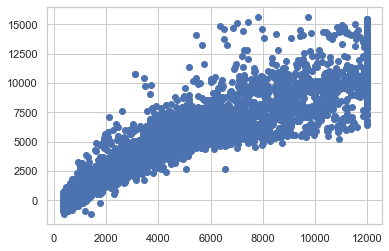

In [404]:
y_pred_3 = regression_model.predict(X_test_scaled_encoded)
plt.scatter(y_test, y_pred_3);

# PROBLEM 2
## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [432]:
df = pd.read_csv("Holiday_Package.csv")

In [433]:
df.head(3)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no


In [434]:
df.duplicated().sum()

0

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [425]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.00,436.50,251.87,1.00,218.75,436.50,654.25,872.00
Salary,872.00,47729.17,23418.67,1322.00,35324.00,41903.50,53469.50,236961.00
age,872.00,39.96,10.55,20.00,32.00,39.00,48.00,62.00
educ,872.00,9.31,3.04,1.00,8.00,9.00,12.00,21.00
no_young_children,872.00,0.31,0.61,0.00,0.00,0.00,0.00,3.00
no_older_children,872.00,0.98,1.09,0.00,0.00,1.00,2.00,6.00


In [435]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [436]:
df['Unnamed: 0'].value_counts()

872    1
287    1
298    1
297    1
296    1
      ..
578    1
577    1
576    1
575    1
1      1
Name: Unnamed: 0, Length: 872, dtype: int64

In [437]:
df.drop('Unnamed: 0',axis = 1,inplace= True)

### Check for Outliers

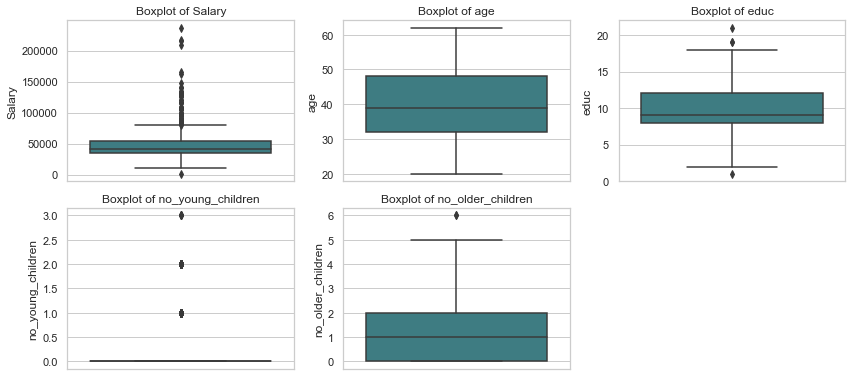

In [454]:
plt.figure(figsize = (12,8))
Features = df.select_dtypes(exclude='object').columns
for i in range(len(Features)):
    plt.subplot(3,3, i + 1)
    sns.boxplot(y = df[Features[i]], data = df, palette= 'crest')
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [427]:
df.groupby(["Holliday_Package"]).count()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,,
no,471,471,471,471,471,471,471
yes,401,401,401,401,401,401,401


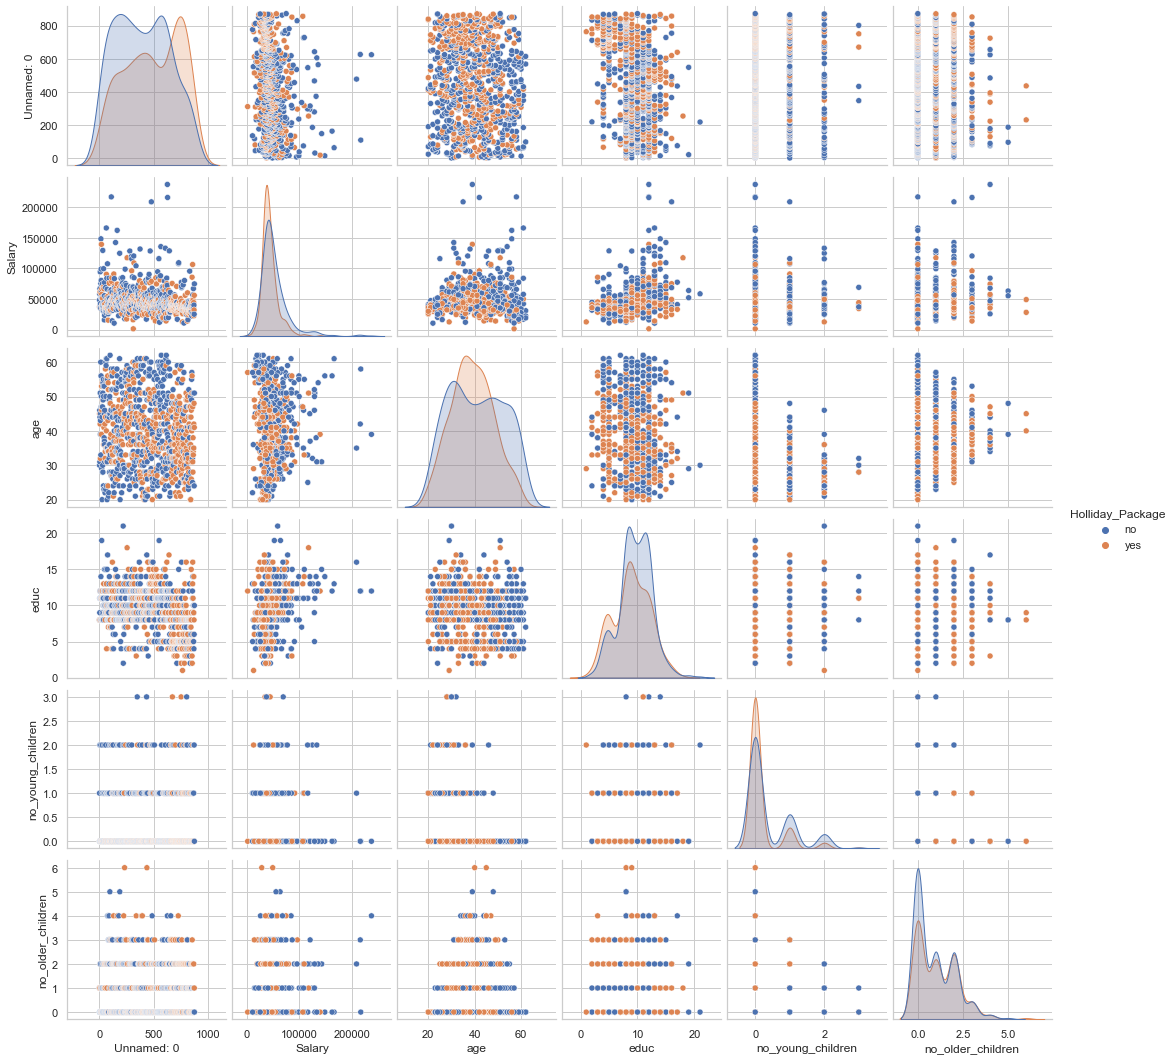

In [430]:
sns.pairplot(df , hue='Holliday_Package' , diag_kind = 'kde');

In [442]:
df.skew(axis = 0, skipna = True)

Salary               3.10
age                  0.15
educ                -0.05
no_young_children    1.95
no_older_children    0.95
dtype: float64

In [443]:
Cat_Features = df.select_dtypes(include='object').columns
Cat_Features

Index(['Holliday_Package', 'foreign'], dtype='object')

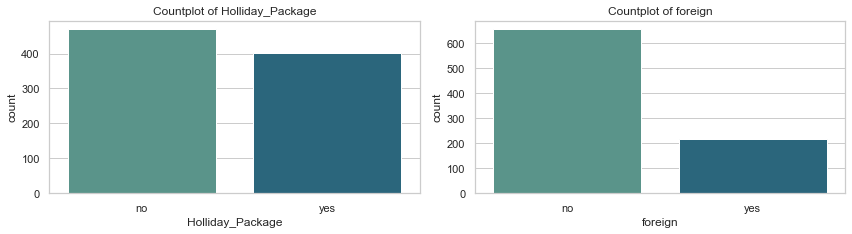

In [446]:
plt.figure(figsize = (12,6))
for i in range(len(Cat_Features)):
    plt.subplot(2,2, i + 1)
    sns.countplot(x = df[Cat_Features[i]], data = df, palette ='crest')
    plt.title(f"Countplot of {Cat_Features[i]}")
    plt.tight_layout()

In [447]:
Num_Features = df.select_dtypes(exclude='object').columns

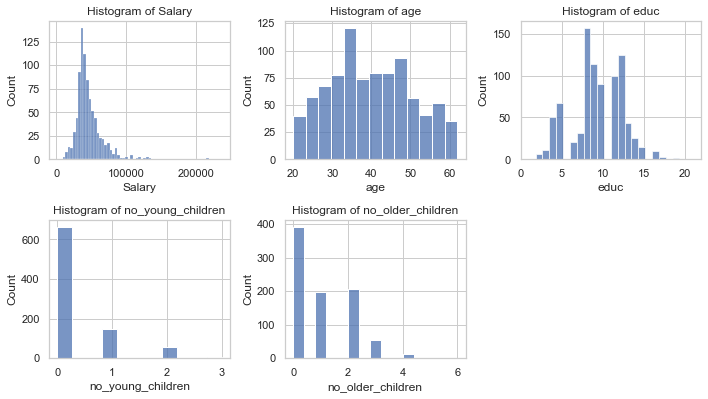

In [452]:
plt.figure(figsize = (10,8))
for i in range(len(Num_Features)):
    plt.subplot(3,3, i + 1)
    sns.histplot(x = df[Num_Features[i]], data = df, palette ='crest' )
    plt.title(f"Histogram of {Num_Features[i]}")
    plt.tight_layout()

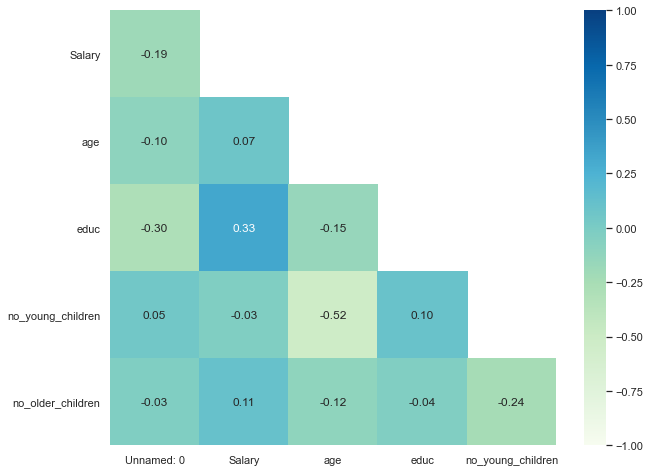

In [431]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df.corr().iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='GnBu',
           vmin=-1, vmax=1)
# yticks
#plt.yticks(rotation=0)
plt.show()

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [455]:
Cat_Features

Index(['Holliday_Package', 'foreign'], dtype='object')

In [456]:
df['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [457]:
df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [458]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=[['Holliday_Package','foreign']],return_df=True,
                           mapping=[
{'col':'Holliday_Package', 'mapping':{'no':0,'yes':1}},
{'col':'foreign', 'mapping':{'no':0,'yes':1}}])

In [459]:
df_encoded = encoder.fit_transform(df)

In [461]:
df_encoded.head(3)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0


In [462]:
df_encoded['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [463]:
df_encoded['foreign'].value_counts()

0    656
1    216
Name: foreign, dtype: int64

### Splitting of data

In [464]:
X = df_encoded.drop('Holliday_Package', axis =1)
y = df_encoded['Holliday_Package']

In [465]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

### ------------------------------------------------------- ITERATION 1  -------------------------------------------------------
## Building Logistic Regression Model for the dataframe



In [489]:
from sklearn.linear_model import LogisticRegression
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5442622950819672

In [490]:
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
model_score

0.5305343511450382

In [500]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[139   0]
 [123   0]]


In [471]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       139
           1       0.00      0.00      0.00       123

    accuracy                           0.53       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.28      0.53      0.37       262



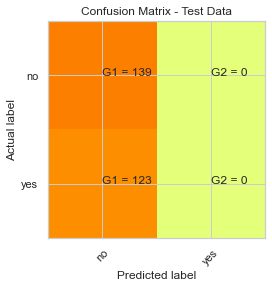

In [472]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['no', 'yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [491]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.602


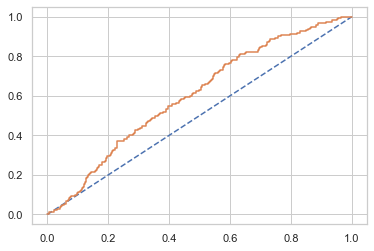

In [493]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

#### AUC and ROC for the test data

AUC: 0.608


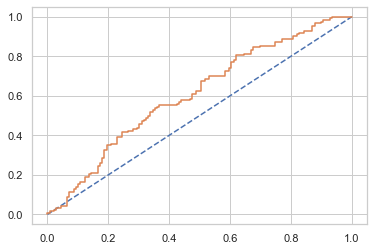

In [494]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

### ------------------------------------------------------- ITERATION 2  -------------------------------------------------------
## Building LDA Model for the dataframe




In [473]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [495]:
model2 = LinearDiscriminantAnalysis()
model2.fit(X_train, y_train)
model2.score(X_train, y_train)


0.6672131147540984

In [496]:
# Test Score
y_predict2 = model2.predict(X_test)
model_score = model2.score(X_test, y_test)
model_score

0.6603053435114504

In [501]:
print(metrics.confusion_matrix(y_test, y_predict2))

[[110  29]
 [ 60  63]]


In [485]:
print(metrics.classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       139
           1       0.68      0.52      0.59       123

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262



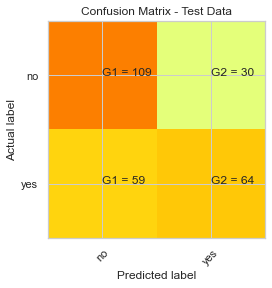

In [486]:
cm = metrics.confusion_matrix(y_test, y_predict2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['no', 'yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

AUC: 0.721


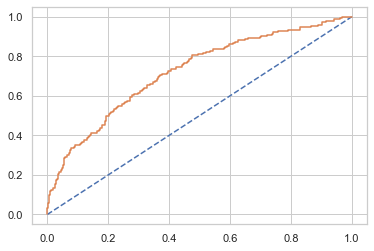

In [497]:
# predict probabilities
probs = model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

AUC: 0.746


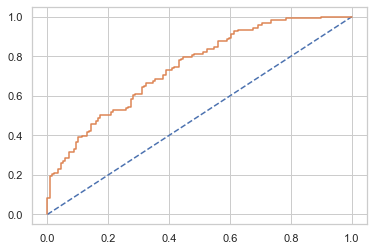

In [499]:
# predict probabilities
probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

In [502]:
lastName: int = 'Miller';

In [505]:
lastName: int 

In [506]:
lastName

'Miller'